In [38]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [39]:
#data
rawData = pd.read_csv('data_cleaned.csv')
#rawData = pd.read_csv('data_proof.csv')
rawData.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  30000 non-null  int64
 1   ID          30000 non-null  int64
 2   LIMIT_BAL   30000 non-null  int64
 3   SEX         30000 non-null  int64
 4   EDUCATION   30000 non-null  int64
 5   MARRIAGE    30000 non-null  int64
 6   AGE         30000 non-null  int64
 7   PAY_1       30000 non-null  int64
 8   PAY_2       30000 non-null  int64
 9   PAY_3       30000 non-null  int64
 10  PAY_4       30000 non-null  int64
 11  PAY_5       30000 non-null  int64
 12  PAY_6       30000 non-null  int64
 13  BILL_AMT1   30000 non-null  int64
 14  BILL_AMT2   30000 non-null  int64
 15  BILL_AMT3   30000 non-null  int64
 16  BILL_AMT4   30000 non-null  int64
 17  BILL_AMT5   30000 non-null  int64
 18  BILL_AMT6   30000 non-null  int64
 19  PAY_AMT1    30000 non-null  int64
 20  PAY_AMT2    30000 non-null  

In [41]:
#selectfeatures
X = rawData.iloc[:,3:7]
print('Summary of feature sample')
X.head(5)

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE
0,2,2,1,24
1,2,2,2,26
2,2,2,2,34
3,2,2,1,37
4,1,2,1,57


In [42]:
#dependent variable
y = rawData['DEFAULT']
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [44]:
#use linear aggression to detec whether customer would default. result is not categorical.
model = LinearRegression(n_jobs=10)
reg=model.fit(X,y)
print(cross_val_score(model,X,y,cv=3))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
preds = model.predict(X_test)
model.coef_   #prints out the coefficients used for linear regrassion for each fature

[0.00120422 0.00185823 0.001138  ]


array([-0.03529931,  0.01780149, -0.01834094, -0.00023723])

In [45]:
# use classification to detect whether the custoemr will default based on basic info
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X = rawData.iloc[:,3:7] # use basic info to identify amount
y = rawData['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)
algo = DecisionTreeClassifier(max_depth=5)  # must specify max_depth, otherwise generates too many layers
#algo = RandomForestClassifier(max_depth=10)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
pred_correct = sum((preds==y_test)) 
pred_wrong = sum(preds!=y_test)
print("Prediction summary: Correct=%d, Wrong=%d, Correct ratio=%d%s"%(pred_correct,pred_wrong,pred_correct/len(y_test)*100,'%'))

Prediction summary: Correct=7049, Wrong=1951, Correct ratio=78%


In [46]:
#test code
a=(preds==y_test)
print(a[20:40])
print(sum(a[20:40]))

4582      True
6154     False
15161     True
15041     True
28665    False
22975     True
7396     False
7008      True
11478     True
1112      True
25265     True
8997      True
29525     True
24791     True
5346      True
2459      True
9081      True
8005      True
4789      True
1811      True
Name: DEFAULT, dtype: bool
17


In [47]:
#selecc features for limit amount analysis
#X = rawData.iloc[:,3:25] #22-24
X = rawData.iloc[:,3:19]
print('Summary of feature sample')
print(X.head(5))
y = rawData['LIMIT_BAL']
print('Summary of dependent')
print(y.head(5))
#model = LinearRegression(n_jobs=10)
#print(cross_val_score(model,X,y,cv=3))
#regression
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
for i in range(len(names)):
    print(names[i],results[i].mean(),results[i].max(),results[i].min())

Summary of feature sample
   SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0    2          2         1   24      2      2     -1     -1     -2     -2   
1    2          2         2   26     -1      2      0      0      0      2   
2    2          2         2   34      0      0      0      0      0      0   
3    2          2         1   37      0      0      0      0      0      0   
4    1          2         1   57     -1      0     -1      0      0      0   

   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  
0       3913       3102        689          0          0          0  
1       2682       1725       2682       3272       3455       3261  
2      29239      14027      13559      14331      14948      15549  
3      46990      48233      49291      28314      28959      29547  
4       8617       5670      35835      20940      19146      19131  
Summary of dependent
0     20000
1    120000
2     90000
3     50000
4     50000
Name

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)
algo = RandomForestRegressor()
#algo = RandomForestClassifier(max_depth=10)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)

Prediction summary: Correct=4585, Wrong=4415, Correct ratio=50%


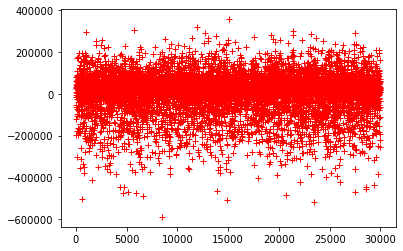

In [23]:
threshold=50000
pred_correct = sum(abs(preds-y_test)<=threshold) 
pred_wrong = sum(abs(preds-y_test)>threshold) 
print("Prediction summary: Correct=%d, Wrong=%d, Correct ratio=%d%s"%(pred_correct,pred_wrong,pred_correct/len(y_test)*100,'%'))
plt.plot(preds-y_test,'+r')

Prediction summary: Correct=6068, Wrong=2932, Correct ratio=67%


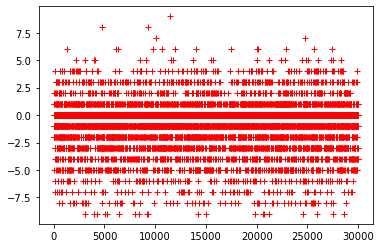

In [24]:
algo = RandomForestClassifier(max_depth=10)
amount_cut = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,2000000] # last number larger than max to avoid NaN
y_grp=pd.cut(y,amount_cut,right=False, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X,y_grp,test_size=0.3, random_state=123)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
threshold=1
pred_correct = sum(abs(preds-y_test)<=threshold) 
pred_wrong = sum(abs(preds-y_test)>threshold) 
print("Prediction summary: Correct=%d, Wrong=%d, Correct ratio=%d%s"%(pred_correct,pred_wrong,pred_correct/len(y_test)*100,'%'))
plt.plot(preds-y_test,'+r')